## Tutorial from Hands-on Machine Learning

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

data   : each row is an element (an image of a hand-written number), and the 784 columns are the pixels intensity (from 0-white to 255-black) of each image

target : the corresponding numeric number to the pixel image 

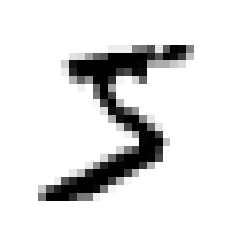

In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = mnist['data'].values[0]
digit_image = some_digit.reshape(28,28)

plt.imshow(digit_image,cmap='binary')
plt.axis('off')
plt.show()

See mnist description. Dataset is already split in trainning and test dataset at 60.000

In [59]:
X, y = mnist['data'].values, mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [60]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [61]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [105]:
for idx in [0,81]:
    rand_digit = mnist['data'].values[idx]
    print(sgd_clf.predict(rand_digit.reshape(1,784)), mnist['target'].values[idx])

[ True] 5
[ True] 0


We see a problem. At index 0, it went well, 5 is correctly predicted. At index 81, the image of 5 is mistaken for a 0.

### Performance Measures


In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Here we have high accuracy (TP + TN) / (TP + TN + FP + FN)

But if we used an dumb estimator that return False all the time, we would still have a 90% accuracy score, because there are only 10% of 5's in the dataset.

In [107]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

cross_val_predict returns a prediction for each fold (three in this case)

We can use a confusion matrix to evaluate the performance.

It's in the form of :

| Actual         | Predicted Neg | Predicted Pos |
|----------------|---------------|---------------| 
| non-5's images |     TN        |      FP       |
| 5's images     |     FN        |      TP       |

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Then, there are

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

And also the F1 Score ! Which is a harmonic mean between precision and recall

In [109]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846